콜백함수란? 어떤 함수를 수행 시 그 함수에서 사용자가 지정한 함수를 호출하는 것.

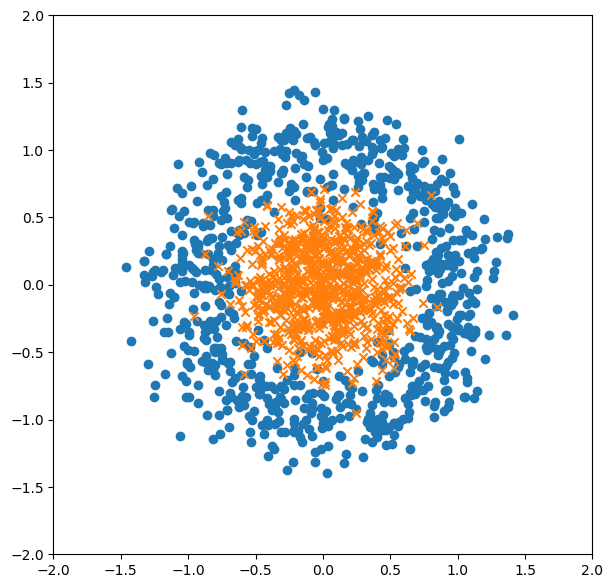

In [12]:
""" ▶ Step 1. EarlyStopping을 테스트할 데이터 만들기 """

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data, target = make_circles(n_samples=2000, noise=0.2, factor=0.3)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, aspect='equal', xlim=(-2, 2), ylim=(-2, 2))
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="o")
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="x")
plt.show()

In [13]:
""" ▶ Step 2. 간단한 신경망을 만들어서 학습시키자 """

model = Sequential([
    Dense(16, activation='tanh', input_shape=(2,)),
    Dense(1, activation='sigmoid'),
])
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=[x_test, y_test])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                48        
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.6970 - acc: 0.5144 - val_loss: 0.6967 - val_acc: 0.5350
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6943 - acc: 0.5569 - val_loss: 0.6949 - val_acc: 0.5700
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - acc: 0.5875 - val_loss: 0.6936 - val_acc: 0.5975
Epoch 4/100
50/50 [==

Epoch 58/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3451 - acc: 0.9406 - val_loss: 0.3510 - val_acc: 0.9400
Epoch 59/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3376 - acc: 0.9425 - val_loss: 0.3430 - val_acc: 0.9400
Epoch 60/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3304 - acc: 0.9438 - val_loss: 0.3354 - val_acc: 0.9425
Epoch 61/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3231 - acc: 0.9413 - val_loss: 0.3280 - val_acc: 0.9400
Epoch 62/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3161 - acc: 0.9431 - val_loss: 0.3209 - val_acc: 0.9425
Epoch 63/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3096 - acc: 0.9413 - val_loss: 0.3139 - val_acc: 0.9450
Epoch 64/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3031 - acc: 0.9456 - val_loss: 0.3073 - val_acc: 0.9475
Epoch 65/100
50/50 [==============================] - 0s 2ms/step - loss: 0.

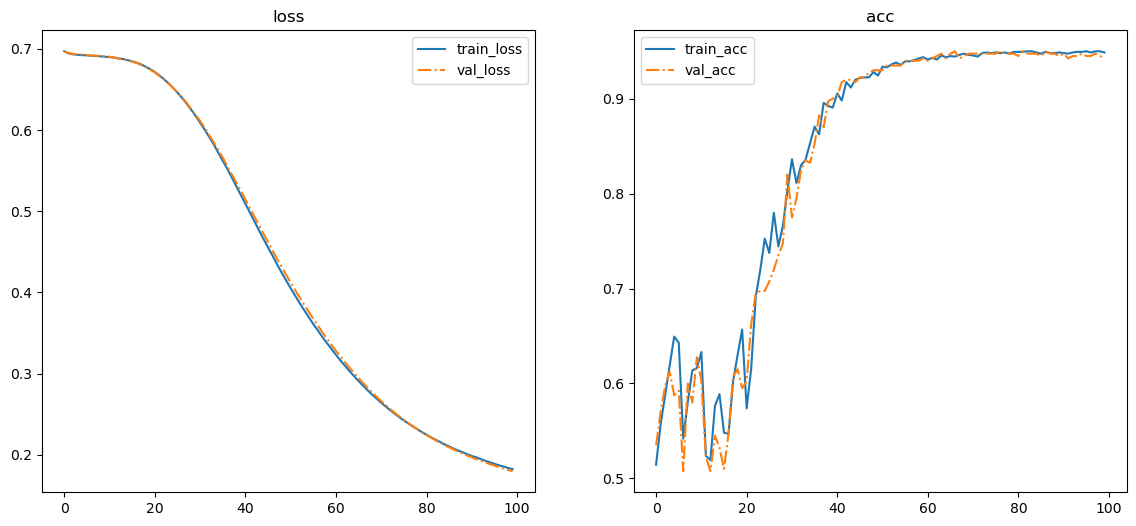

In [14]:
#Q4) 손실함수와 정답률의 변화를 시각화 
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, title="loss")
ax.plot(hist.epoch, hist.history["loss"], label="train_loss")
ax.plot(hist.epoch, hist.history["val_loss"], linestyle="-.", label="val_loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2, title="acc")
ax.plot(hist.epoch, hist.history["acc"], label="train_acc")
ax.plot(hist.epoch, hist.history["val_acc"], linestyle="-.", label="val_acc")
ax.legend()
plt.show()

###  tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

In [15]:
""" ▶ Step 3. EarlyStopping을 넣어 학습시켜 보자 """

from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Dense(16, activation='tanh', input_shape=(2,)),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,
                               patience=10, verbose=1, restore_best_weights=True)

hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=[x_test, y_test],
                 callbacks=[early_stopping])
# monitor에 설정된 값이 patience 값의 횟수를 계속해서 min_delta 이상 개선되지 않으면 학습이 중지
              # monitor에는 'val_loss' 외에 'val_acc'등도 설정할 수 있다. 

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.7395 - acc: 0.4913 - val_loss: 0.7187 - val_acc: 0.5175
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7158 - acc: 0.5188 - val_loss: 0.7043 - val_acc: 0.5425
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7039 - acc: 0.5356 - val_loss: 0.6965 - val_acc: 0.5675
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6971 - acc: 0.5688 - val_loss: 0.6932 - val_acc: 0.6200
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6935 - acc: 0.6044 - val_loss: 0.6913 - val_acc: 0.6500
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6915 - acc: 0.6494 - val_loss: 0.6910 - val_acc: 0.6625
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6903 - acc: 0.5794 - val_loss: 0.6900 - val_acc: 0.5300
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6895 - a

50/50 [==============================] - 0s 2ms/step - loss: 0.3270 - acc: 0.9300 - val_loss: 0.3301 - val_acc: 0.9425
Epoch 64/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3192 - acc: 0.9331 - val_loss: 0.3220 - val_acc: 0.9400
Epoch 65/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3116 - acc: 0.9350 - val_loss: 0.3142 - val_acc: 0.9425
Epoch 66/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3046 - acc: 0.9350 - val_loss: 0.3066 - val_acc: 0.9400
Epoch 67/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2977 - acc: 0.9350 - val_loss: 0.2994 - val_acc: 0.9450
Epoch 68/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2910 - acc: 0.9400 - val_loss: 0.2927 - val_acc: 0.9450
Epoch 69/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2847 - acc: 0.9419 - val_loss: 0.2861 - val_acc: 0.9425
Epoch 70/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2790 - acc: 0

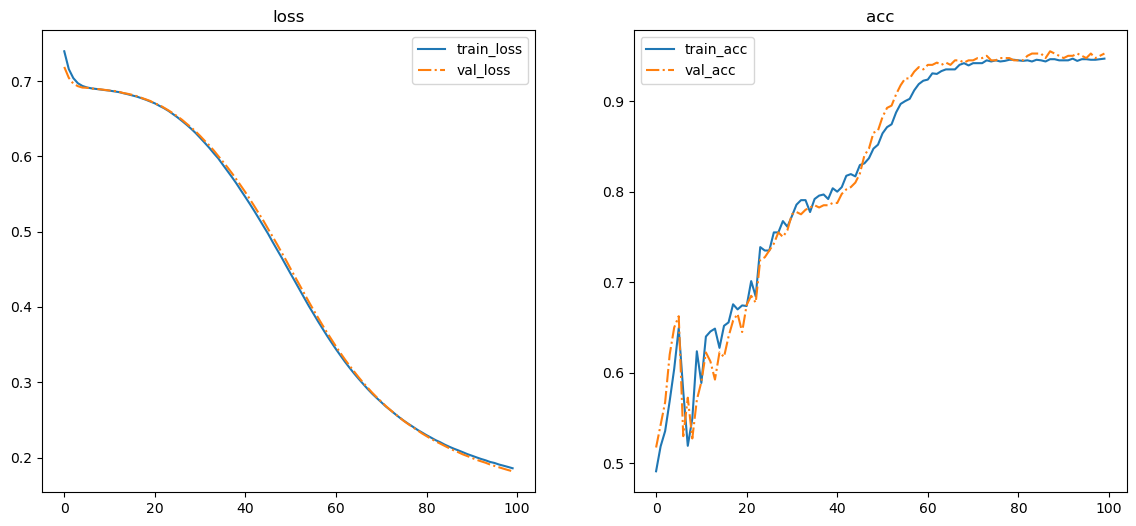

In [16]:
#Q4) 손실함수와 정답률의 변화를 시각화 
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, title="loss")
ax.plot(hist.epoch, hist.history["loss"], label="train_loss")
ax.plot(hist.epoch, hist.history["val_loss"], linestyle="-.", label="val_loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2, title="acc")
ax.plot(hist.epoch, hist.history["acc"], label="train_acc")
ax.plot(hist.epoch, hist.history["val_acc"], linestyle="-.", label="val_acc")
ax.legend()
plt.show()

In [17]:
# 정답이 특정값 이상됐을 떄 중단하고 싶으면. (90%)

from keras.callbacks import EarlyStopping


early_stopping =  EarlyStopping(
                            monitor='val_acc',
                            min_delta=0.0001,
                            patience=5, verbose=1, restore_best_weights=True,
                            mode = 'max'
)

history = model.fit(
                    x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=[x_test, y_test],
                    callbacks=[early_stopping] 
            )# monitor에 설정된 값이 patience 값의 횟수를 계속해서 min_delta 이상 개선되지 않으면 학습이 중지
              # monitor에는 'val_loss' 외에 'val_acc'등도 설정할 수 있다. 

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.1848 - acc: 0.9450 - val_loss: 0.1790 - val_acc: 0.9550
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1813 - acc: 0.9463 - val_loss: 0.1758 - val_acc: 0.9500
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1786 - acc: 0.9481 - val_loss: 0.1736 - val_acc: 0.9525
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1769 - acc: 0.9456 - val_loss: 0.1710 - val_acc: 0.9525
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1750 - acc: 0.9450 - val_loss: 0.1688 - val_acc: 0.9550
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1726 - acc: 0.9450 - val_loss: 0.1678 - val_acc: 0.9575
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1713 - acc: 0.9456 - val_loss: 0.1651 - val_acc: 0.9500
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - 